In [2]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import pathlib
import cv2
import argparse
import io
import os
import scipy.misc
import numpy as np
import time
import glob
from IPython.display import display
from six import BytesIO
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings


In [3]:
# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = 'D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/exported-models/01-my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = 'D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

Loading model...Done! Took 13.276644229888916 seconds


In [121]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

In [122]:
# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = 'D:/Pemrograman/Python/Project/google_image_scraper/Google-Image-Scraper/photos/food/test/tempegorengindonesia6.jpeg'
print('Running inference for {}... '.format(IMAGE_PATHS), end='')

Running inference for D:/Pemrograman/Python/Project/google_image_scraper/Google-Image-Scraper/photos/food/test/tempegorengindonesia6.jpeg... 

In [123]:
image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

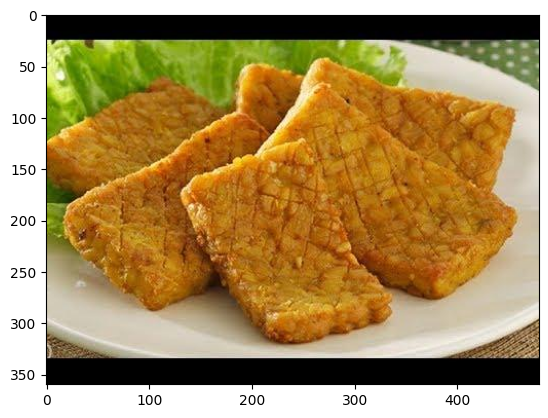

In [126]:
%matplotlib inline 
plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

In [144]:
def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = \
                            output_dict['detection_classes'].astype(np.int64)

  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

In [173]:
image_path_test = r'D:\Pemrograman\Python\Project\google_image_scraper\Google-Image-Scraper\photos\food\test\\'

In [174]:
list_image_file = []
for file in os.listdir(image_path_test):    
    if file.split('.')[-1] != 'xml':
        list_image_file.append(file)
list_image_file

['20220909_111330399_iOS_jpg.rf.86749be18722927dd619181320a8afa3.jpg',
 '20220909_111415799_iOS_jpg.rf.4f9ad7f20ad102da1193dc713e831d64.jpg',
 '20220909_111425388_iOS_jpg.rf.d51228cee03817a9da1aaf3dde7c700f.jpg',
 '20220909_111628071_iOS_jpg.rf.3a9985a27b4c96002b138c413c717fde.jpg',
 '20220909_111639652_iOS_jpg.rf.794db64a55e09e3b03976de873773cc3.jpg',
 '20220909_111641536_iOS_jpg.rf.a0c2d308de3ba101d5ce400e3139eb75.jpg',
 '20220909_111654942_iOS_jpg.rf.5ef25c687adcae17a8026d3caad03549.jpg',
 '7870ed58-d6ad-4a6f-ab1b-c90bbc6ec92a_169_jpg.rf.672461fc95dae7e5278ca80bd86f9f73.jpg',
 'ayam-crispy-kfc-recipega3_jpg.rf.fdcf20c9d028daa4869e9afcab736dc4.jpg',
 'ayam-goreng-tepung-crispy-foto-resep-utama_jpg.rf.652c39d2041f0cebb136e3f47d443dc5.jpg',
 'AyamGorengTepung_jpg.rf.ab681abc8d2b625c2b3830fd7ca1502b.jpg',
 'bba391655f3b84330eaa5330ea444161_jpg.rf.d861d1c5cccb6181ae6290099faceb1a.jpg',
 'BostonCream_0145_JPEG.rf.873cbcc7a1ebcebf5863f542cecfa233.jpg',
 'BostonCream_0146_JPEG.rf.f820873bd0

In [163]:
# import pandas as pd
# test = pd.read_csv('/content/dataset/test_labels.csv')
# #Getting 3 random images to test
# images = list(test.sample(n=3)['filename'])

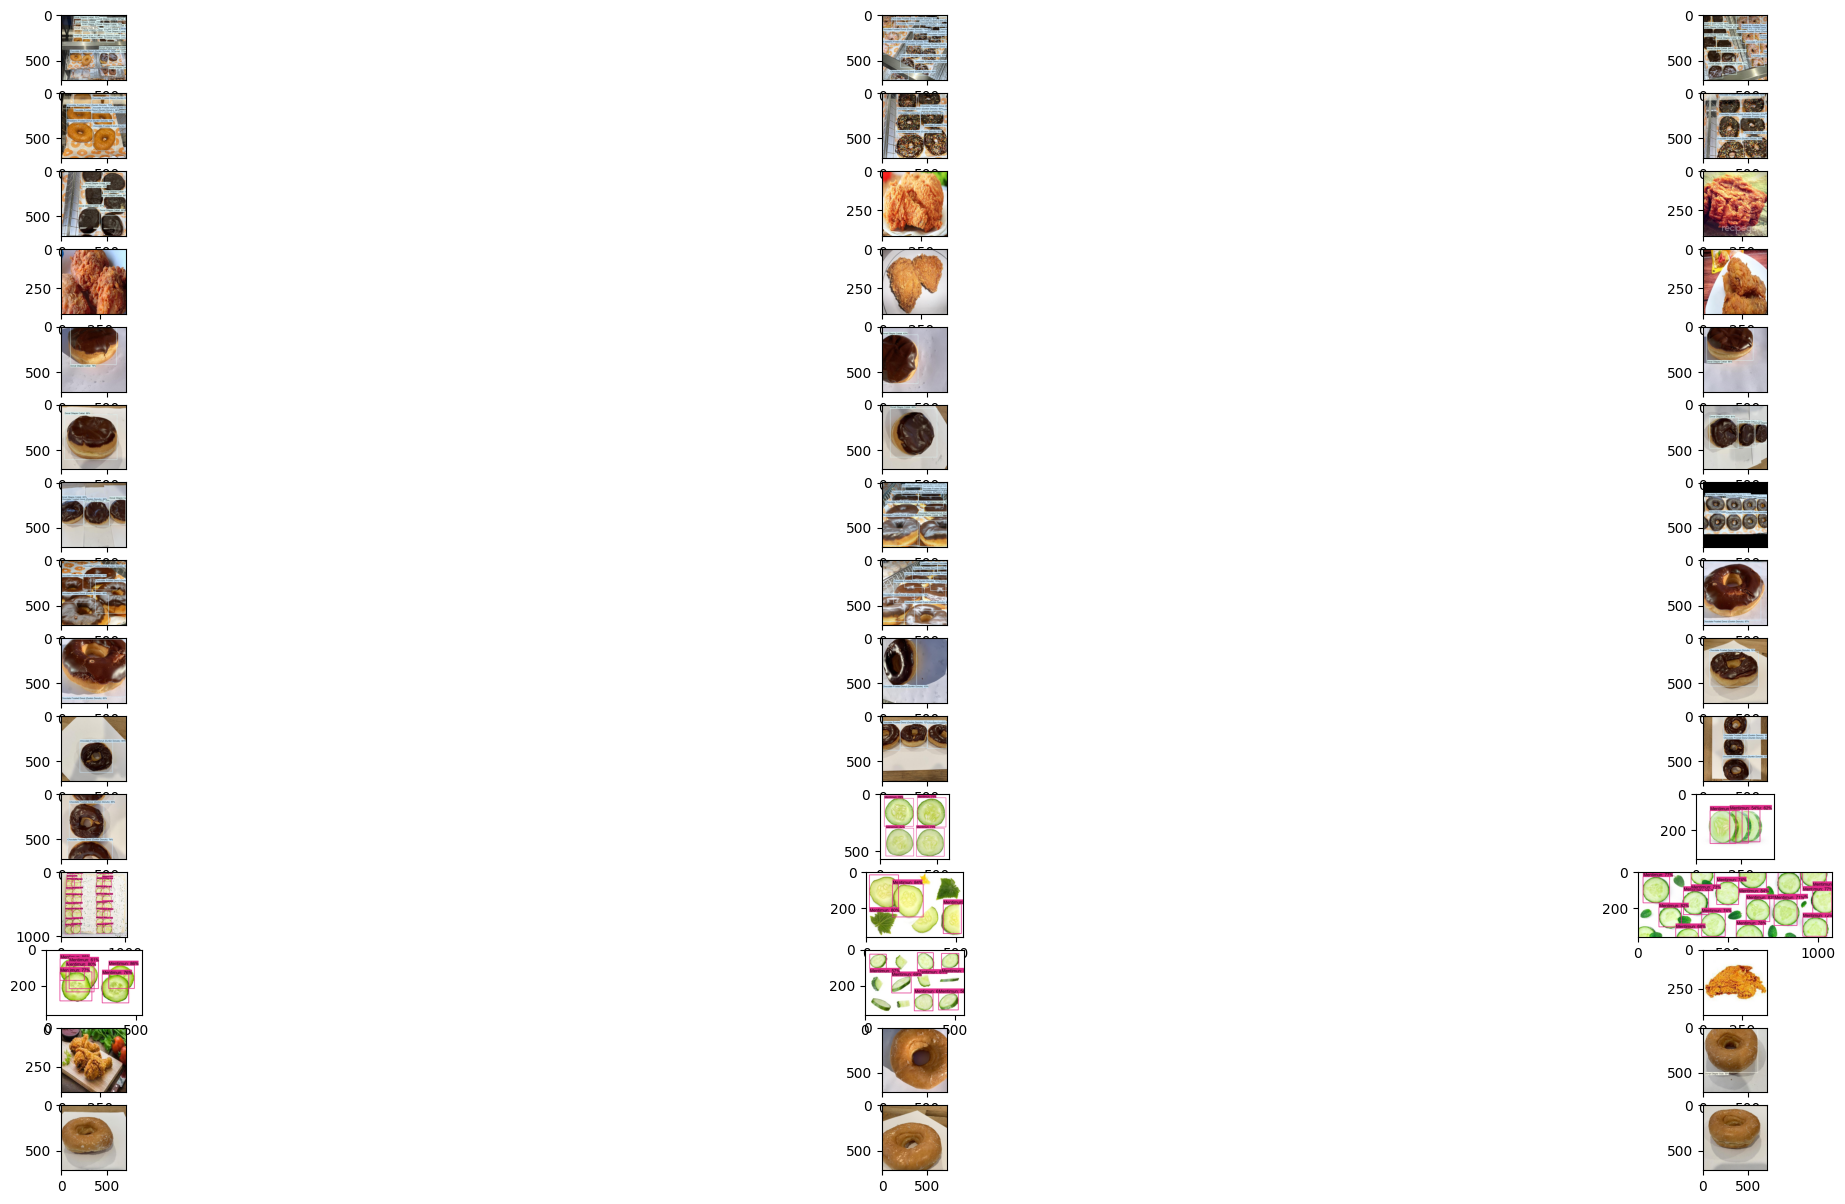

In [192]:
fig = plt.figure(figsize=(30 , 15),dpi=100)
for i, id_in_df in enumerate(list_image_file[:45]):
  ax = fig.add_subplot(15, 3, i + 1)
  image_path = os.path.join(image_path_test,id_in_df)
 
  image = cv2.imread(image_path)
  image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image_expanded = np.expand_dims(image_rgb, axis=0)

  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis, ...]

  # input_tensor = np.expand_dims(image_np, 0)
  detections = detect_fn(input_tensor)

  num_detections = int(detections.pop('num_detections'))
  detections = {key: value[0, :num_detections].numpy()
                for key, value in detections.items()}
  detections['num_detections'] = num_detections

  # detection_classes should be ints.
  detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

  image_with_detections = image.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)
  plt.imshow(cv2.cvtColor(image_with_detections, cv2.COLOR_BGR2RGB))
plt.show()


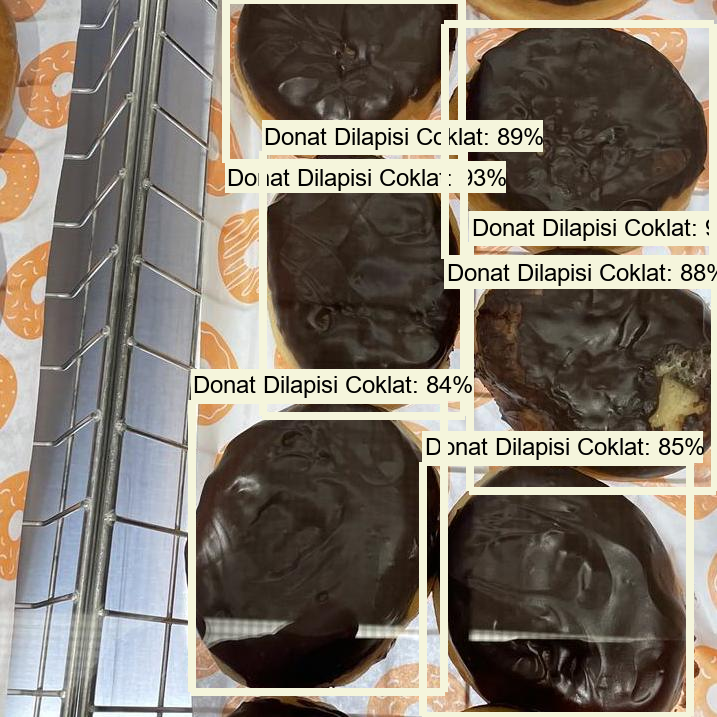

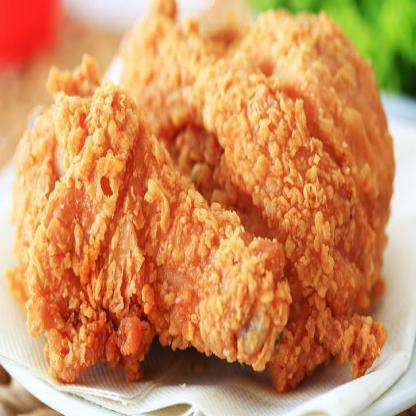

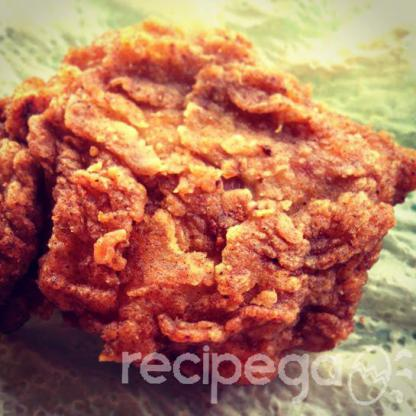

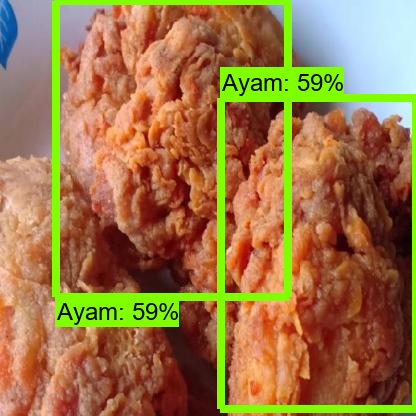

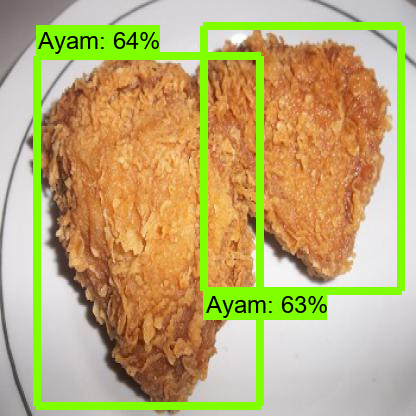

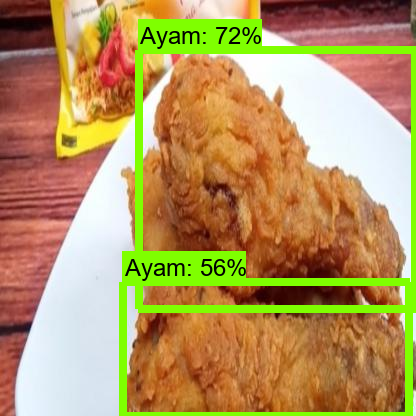

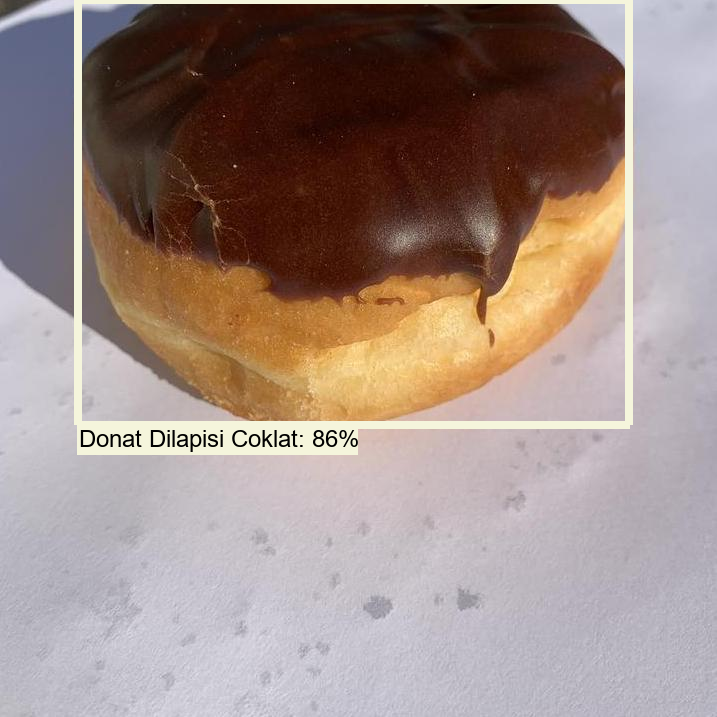

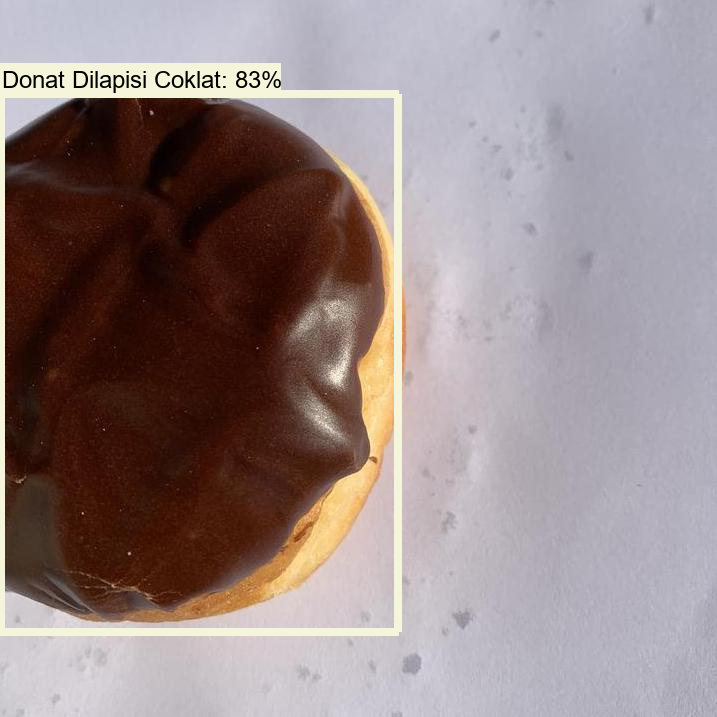

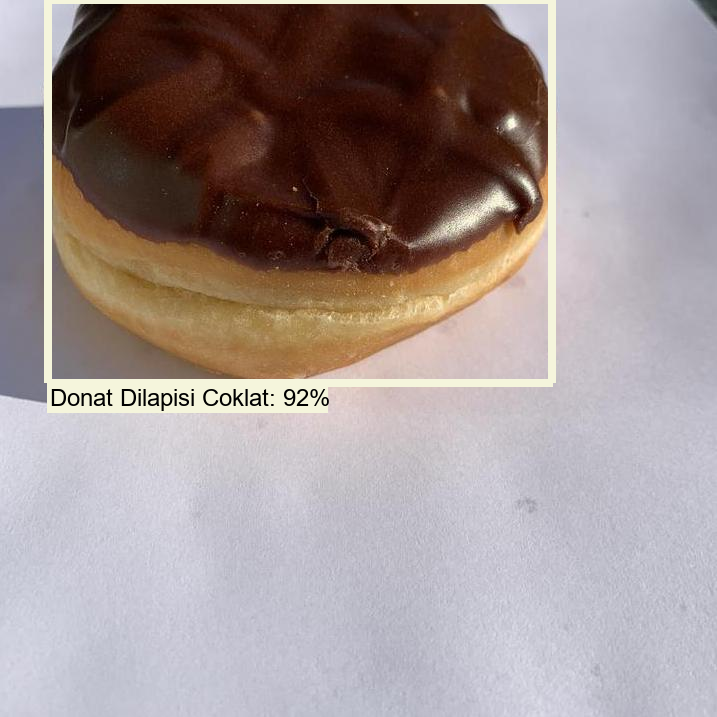

In [164]:
for image_name in list_image_file[6:15]:
  
  image_np = load_image_into_numpy_array(image_path_test+ image_name)
  output_dict = run_inference_for_single_image(detect_fn, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))

### Convert Model to TFLITE

In [32]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model('D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/exported-models/01-my_model_tflite/saved_model') # path to the SavedModel directory
tflite_model = converter.convert()

In [33]:
# Save the model.
with open(r'D:\Pemrograman\Python\Project\Hidup-Sehat-Machine-Learning\ObjectDetection\workspace\exported-models\01-my_model_tflite\model.tflite', 'wb') as f:
  f.write(tflite_model)

### MetaData

In [22]:
# Task Library expects label files that are in the same format as the one below.

_MODEL_PATH = "D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/exported-models/01-my_model_tflite/model.tflite"
_LABEL_FILE = "D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/annotations/labels.txt"
_SAVE_TO_PATH = "model_metadata.tflite"

In [ ]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter


# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

In [42]:
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata
import flatbuffers
import os
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_info
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_writer
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter

_MODEL_PATH = "D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/exported-models/01-my_model_tflite/model.tflite"
_LABEL_FILE = "D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/workspace/annotations/labels.txt"
_SAVE_TO_PATH = "D:/Pemrograman/Python/Project/Hidup-Sehat-Machine-Learning/ObjectDetection/scripts/preprocessing/tes"




model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "HidupSehat Object Detection"
model_meta.description = ("Identify 16 Classes of Foods")
model_meta.version = 'v1'
model_meta.author = "TensorFlow"
model_meta.license = ("Apache License. Version 2.0 "
                        "http://www.apache.org/licenses/LICENSE-2.0.")
# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.description = ("The expected image is 640 x 640, with three channels "
    "(red, blue, and green) per pixel. Each value in the tensor is between"
    " 0 and 255.")
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename(_LABEL_FILE)
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())

# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

model_basename = os.path.basename(_MODEL_PATH)
model_basename
export_model_path = os.path.join(_SAVE_TO_PATH, model_basename)
tf.io.gfile.copy(_MODEL_PATH, export_model_path, overwrite=True)
populator = _metadata.MetadataPopulator.with_model_file(export_model_path)
populator.load_metadata_buffer(metadata_buf)

populator.load_associated_files([_LABEL_FILE])

populator.populate()

displayer = _metadata.MetadataDisplayer.with_model_file(export_model_path)

json_file = displayer.get_metadata_json()
export_json_file = os.path.join(_SAVE_TO_PATH,
                                  os.path.splitext(model_basename)[0] + ".json")
with open(export_json_file, "w") as f:
    f.write(json_file)

#### check meta data

In [50]:
from tflite_support import metadata as _metadata

displayer = _metadata.MetadataDisplayer.with_model_file(r'D:\Pemrograman\Python\Project\Hidup-Sehat-Machine-Learning\ObjectDetection\scripts\preprocessing\tes\model.tflite')
export_json_file = "extracted_metadata_model.json"
json_file = displayer.get_metadata_json()

# Optional: write out the metadata as a json file
with open(export_json_file, "w") as f:
  f.write(json_file)

ValueError: The model does not have metadata.